In [1]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns; sns.set()
from joblib import dump, load
from scipy.stats.mstats import gmean
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, make_scorer, classification_report, plot_confusion_matrix
from imblearn.metrics import geometric_mean_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('131770-svm.txt', sep="\t")

In [4]:
df

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.004300,0.641150,0.071521,0.056952,0.032975,0.030591,0.032426,0.027828,0.024113,0.013456,...,4.3336,2.8028,3.9472,4.2138,19.637,9.14910,16.9780,20.556,0.90518,1
1,0.005741,0.545420,0.180190,0.079392,0.052599,0.045670,0.037553,0.030052,0.029881,0.038449,...,3.9987,2.5162,3.9390,3.9711,17.330,7.38740,17.0000,18.643,1.00840,1
2,0.005515,0.580380,0.182280,0.088732,0.052382,0.044953,0.038556,0.029836,0.028448,0.037659,...,3.7741,2.5915,3.8183,3.3211,15.904,7.20610,16.1890,12.330,1.13120,1
3,0.004780,0.603620,0.106400,0.097558,0.046050,0.023168,0.033890,0.027448,0.020617,0.022356,...,3.9746,1.3302,4.2694,4.4034,17.233,0.83681,19.2250,23.188,0.93476,1
4,0.004860,0.611220,0.107750,0.096317,0.045792,0.023309,0.033736,0.027461,0.020587,0.022931,...,3.8834,1.9425,4.2562,4.1357,16.654,3.58460,19.1360,20.635,0.98190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.004150,0.150780,0.171240,0.715030,0.098369,0.057903,0.050661,0.021990,0.034831,0.010906,...,4.5353,3.4098,3.2499,5.7637,20.536,12.37000,11.1470,39.581,0.53105,1
14996,0.004673,0.081465,0.181100,0.669880,0.073366,0.068422,0.047078,0.017786,0.024626,0.015010,...,4.6292,1.7096,3.6376,6.5872,21.237,1.49270,13.9330,50.607,0.48139,1
14997,0.005126,0.103840,0.172380,0.690680,0.089172,0.093476,0.078372,0.025328,0.025480,0.016733,...,4.3675,3.1511,2.6014,5.4352,19.298,10.07100,7.0263,35.448,0.54107,1
14998,0.004531,0.160600,0.143530,0.753370,0.087829,0.105150,0.036645,0.016121,0.020924,0.023755,...,4.2503,3.9817,2.3332,5.8938,18.459,17.13000,5.4699,41.191,0.48886,1


In [9]:
for col in df.columns:
    if df[col].max() <= 0:
        print('-',col)
    if df[col].min() > 0:
        print('-----------',col)

----------- dissim
----------- el0
----------- el1
----------- el2
----------- el3
----------- el4
----------- el5
----------- el6
----------- el7
----------- el8
----------- el9
----------- el10
----------- el11
----------- el12
----------- el13
----------- el14
----------- el15
----------- el16
----------- el17
----------- el18
----------- el19
----------- el20
----------- el21
----------- el22
----------- el23
----------- el24
----------- el25
----------- el26
----------- el27
----------- el28
----------- el29
----------- el30
----------- el31
----------- max_el
- diffminus
----------- std
----------- maxmiddle
----------- stat0
----------- stat1
----------- stat2
----------- stat3
----------- stat4
----------- stat5
----------- stat6
----------- stat7
----------- stat8
----------- stat9
----------- stat10
----------- stat11
----------- stat12
----------- stat13
----------- stat14
----------- stat15
----------- stat16
----------- stat17
----------- stat18
----------- stat19
--------

# ZAD 4

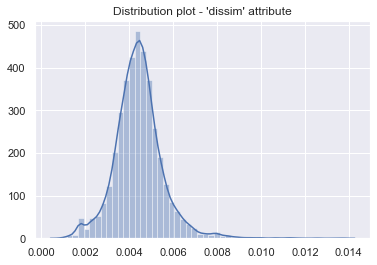

In [70]:
ax = sns.distplot(df[['dissim']])
ax.set_title("Distribution plot - 'dissim' attribute")
plt.savefig("dp_dissim.pdf")
plt.show()

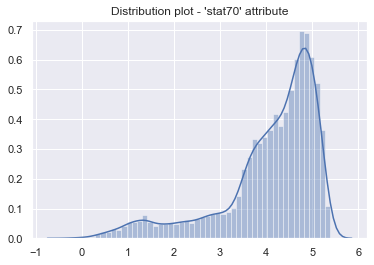

In [68]:
ax = sns.distplot(df[['stat70']])
ax.set_title("Distribution plot - 'stat70' attribute")
plt.savefig("dp_stat70.pdf")
plt.show()

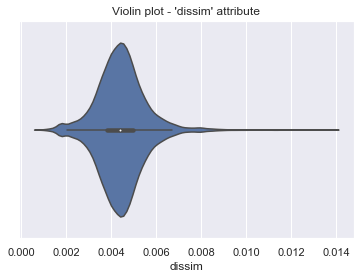

In [71]:
ax = sns.violinplot(x="dissim", data=df)
ax.set_title("Violin plot - 'dissim' attribute")
plt.savefig("vp_dissim.pdf")
plt.show()

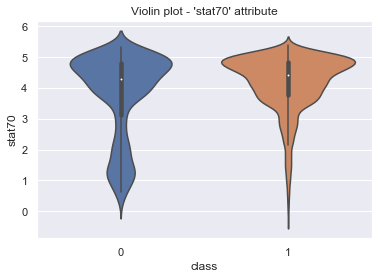

In [72]:
ax = sns.violinplot(x='class',y="stat70", data=df)
ax.set_title("Violin plot - 'stat70' attribute")
plt.savefig("vp_stat70.pdf")
plt.show()

Proporcja klas

In [5]:
df['class'].value_counts(normalize=True)

1    0.7402
0    0.2598
Name: class, dtype: float64

liczba i rodzaje atrybutów

In [6]:
df.info()
# 119 atrybutów typu float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 120 entries, dissim to class
dtypes: float64(119), int64(1)
memory usage: 13.7 MB


In [7]:
# list(df.columns)

ich zakresy i rozkłady wartości

In [8]:
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.004433,0.648995,0.252816,0.107755,0.070239,0.065739,0.041069,0.054703,0.058772,0.045799,...,4.003877,3.877546,4.074545,5.211182,16.807222,15.799964,17.244164,31.311557,0.468975,0.740200
std,0.001109,0.183977,0.168307,0.136893,0.088181,0.093128,0.085224,0.126038,0.167544,0.139284,...,1.126867,1.196677,1.071625,1.543570,7.190438,7.927079,6.929794,17.700307,0.323690,0.438539
min,0.000905,0.011645,0.001364,0.000597,0.000221,0.000159,0.000135,0.000094,0.000078,0.000059,...,-0.244420,0.045404,-0.274790,0.415410,-1.570800,-1.400800,-1.623300,-1.060800,0.057908,0.000000
25%,0.003805,0.596315,0.125320,0.037482,0.027045,0.023100,0.004985,0.003184,0.003296,0.001424,...,3.622300,3.325600,3.705700,4.353300,12.689750,10.447500,13.265000,19.608250,0.288430,0.000000
50%,0.004397,0.685405,0.210065,0.071839,0.049558,0.040678,0.013272,0.016381,0.012872,0.008083,...,4.344000,4.143950,4.395500,5.156450,18.679000,17.008000,19.039500,27.822000,0.345780,1.000000
75%,0.004971,0.762170,0.345988,0.118373,0.081148,0.071708,0.036307,0.040426,0.034645,0.025769,...,4.817125,4.855400,4.838800,6.051650,22.534000,22.872000,22.697000,39.344000,0.468350,1.000000
max,0.013785,0.968690,0.955870,0.946360,0.973070,0.979840,0.878320,0.946870,0.975670,0.966400,...,5.388100,5.388100,5.388100,9.640900,27.032000,27.032000,27.032000,90.969000,2.141600,1.000000


In [9]:
# kolumny o dokąłdnie takich samych atrybutach
sorted_df = df.copy()
# sorted_df.values.sort(axis=0)
sorted_df[:] = np.sort(sorted_df, axis=0)
sorted_df.columns.duplicated().T

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
#takie same średnie,min,max
means_dict = {}
min_dict = {}
max_dict = {}
for col in df.columns:
    temp_mean = round(df[col].mean(),4) # UWAGA ZAOKRĄGLENIE!
    temp_min = df[col].min()
    temp_max = df[col].max()
    # mean
    if temp_mean in means_dict.keys():
        means_dict[temp_mean].append(col)
    else:
        means_dict[temp_mean] = [col]
    # min 
    if temp_min in min_dict.keys():
        min_dict[temp_min].append(col)
    else:
        min_dict[temp_min] = [col]
    # max
    if temp_max in max_dict.keys():
        max_dict[temp_max].append(col)
    else:
        max_dict[temp_max] = [col]

for k,v in means_dict.items():
    if len(v) > 1:
        print(k," : ",v)
print('-'*10)
for k,v in min_dict.items():
    if len(v) > 1:
        print(k," : ",v)
print('-'*10)
for k,v in max_dict.items():
    if len(v) > 1:
        print(k," : ",v)
print('-'*10)

0.0371  :  ['el9', 'el18']
0.0043  :  ['el23', 'stat9', 'stat10']
0.0062  :  ['el25', 'stat6']
0.0039  :  ['stat11', 'stat17']
0.0014  :  ['stat22', 'stat30']
0.0012  :  ['stat27', 'stat28']
----------
0.0  :  ['diff', 'diffplus', 'diff/std**0.7', 'diff/std**1', 'diff/std**1.3', 'class']
-0.70711  :  ['stat36', 'stat37', 'stat38', 'stat39', 'stat40', 'stat41', 'stat42', 'stat43', 'stat44', 'stat45', 'stat46', 'stat47', 'stat48', 'stat49', 'stat50', 'stat51', 'stat52', 'stat53', 'stat54', 'stat55', 'stat56', 'stat57', 'stat58', 'stat59', 'stat60', 'stat61', 'stat62', 'stat63', 'stat64', 'stat65', 'stat66', 'stat67']
----------
0.9798399999999999  :  ['el4', 'max_el']
0.70711  :  ['stat36', 'stat37', 'stat38', 'stat39', 'stat40', 'stat41', 'stat42', 'stat43', 'stat44', 'stat45', 'stat46', 'stat47', 'stat48', 'stat49', 'stat50', 'stat51', 'stat52', 'stat53', 'stat54', 'stat55', 'stat56', 'stat57', 'stat58', 'stat59', 'stat60', 'stat61', 'stat62', 'stat63', 'stat64', 'stat65', 'stat66', 's

Jaką trafność i jakie G-mean uzyskałby klasyfikator "Zero Rule"? 

In [11]:
# Tranfność zero-rule
print('Zero rule: ',max(list(df['class'].value_counts(normalize=True))))
# Tranfność random-search
rand = 0
for i in list(df['class'].value_counts(normalize=True)):
    rand += i*i
print('Random search: ',rand)

Zero rule:  0.7402
Random search:  0.6153920799999999


In [12]:
df['class'].value_counts()

1    11103
0     3897
Name: class, dtype: int64

In [13]:
# G-mean dla Zero-rule
specifity = 0
sensitivity = 1

gmean([sensitivity,specifity])

0.0

# ZAD 5

In [14]:
features = list(df.columns)
features.remove('class')
x = df.loc[:, features].values
y = df.loc[:,['class']].values
x = StandardScaler().fit_transform(x) # UWAGA STANDARYZOWANY!!!

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca2df = pd.concat([principalDf, df[['class']]], axis = 1)
print('Procent wariancji zachowany przy rzutowaniu')
pca.explained_variance_ratio_

Procent wariancji zachowany przy rzutowaniu


array([0.22071765, 0.12487719])

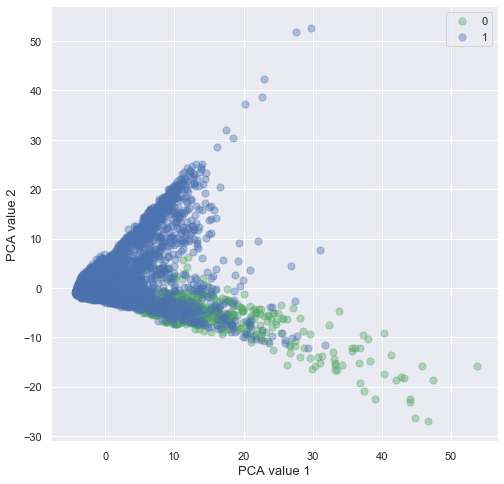

In [20]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA value 1', fontsize = 13)
ax.set_ylabel('PCA value 2', fontsize = 13)
targets = [0,1]
colors = ['g','b']
for target, color in zip(targets,colors):
    indicesToKeep = pca2df['class'] == target
    ax.scatter(
        pca2df.loc[indicesToKeep, 'principal component 1'],
        pca2df.loc[indicesToKeep, 'principal component 2'],
        c = color,
        alpha=0.4,
        s = 50)
ax.legend(targets)
ax.grid(True)
plt.savefig("pca2d.pdf")

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca3df = pd.concat([principalDf, df[['class']]], axis = 1)
print('Procent wariancji zachowany przy rzutowaniu')
pca.explained_variance_ratio_

Procent wariancji zachowany przy rzutowaniu


array([0.22071765, 0.12487719, 0.0669707 ])

<IPython.core.display.Javascript object>


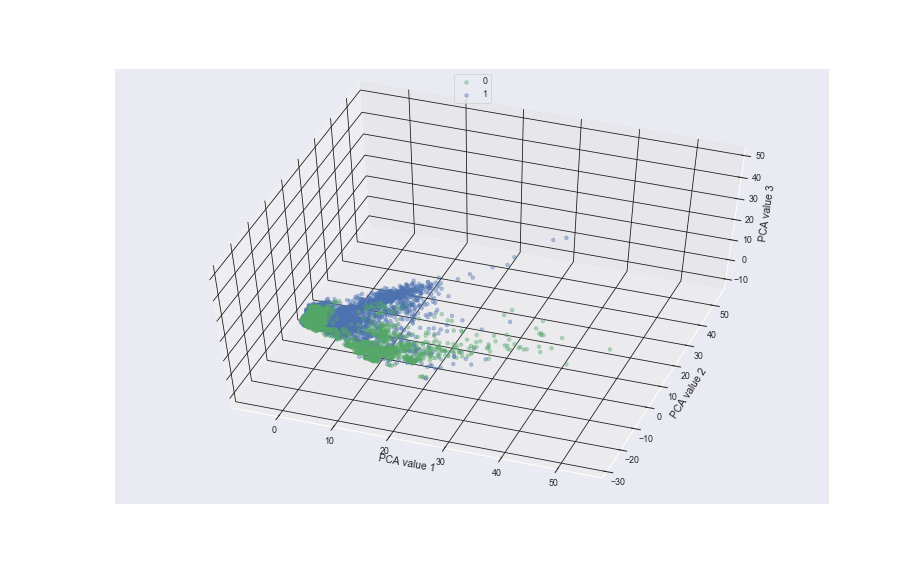

In [40]:
%matplotlib notebook
# %matplotlib inline
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.set_xlabel('PCA value 1', fontsize = 13)
ax.set_ylabel('PCA value 2', fontsize = 13)
ax.set_zlabel('PCA value 3', fontsize = 13)
for target, color in zip(targets,colors):
    indicesToKeep = pca3df['class'] == target
    ax.scatter(
        pca3df.loc[indicesToKeep, 'principal component 1'],
        pca3df.loc[indicesToKeep, 'principal component 2'],
        pca3df.loc[indicesToKeep, 'principal component 3'],
        c = color,
        alpha=0.4)
plt.legend(targets, loc = 'upper center')
plt.rc('grid', color='k')
plt.grid(True)
plt.savefig("pca3d.pdf")
plt.show()

Co możesz powiedzieć o tym problemie klasyfikacji i o spodziewanym zachowaniu SVM?

To będzie trudne zadanie dla SVM, ponieważ podział na klasy decyzyjnę nie jest oczywisty. Wiele z tych punktuw się  nachodzi dlatego też trudno będzie wyznaczyć płaszczyznę która poradzi sobie z podziałem na klasy decyzyjne w tym problemie. Prawdopodobnie trafność SVM nie będzie zbyt wysoka.

# ZAD 6

In [18]:
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])

# # iris_dataset = sklearn.datasets.load_iris()
# # X, y = iris_dataset['data'], iris_dataset['target']

# skf = StratifiedKFold(n_splits=2, shuffle=True)
# # skf = StratifiedKFold(n_splits=2)

# from sklearn.linear_model import LogisticRegression

# # skf.get_n_splits(X, y)
# for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     logreg = LogisticRegression(random_state=42)
#     logreg.fit(X[train_index], y[train_index])
#     print(logreg.score(X[train_index], y[train_index]))
#     print(logreg.score(X[test_index], y[test_index]))
#     print('-'*10)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/stable/modules/cross_validation.html

***Zastanów się, jak włączanie/wyłączanie mieszania może wpływać na uzyskaną trafność**.*

Włączenie/wyłączenie parametru shuffle może wpłynąć na uzyskaną trafność. Przykładem może być nawet mały zbiór z dokumentacji Scikit-Learn.

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])

Kiedy nie mieszamy przykładów na początku wybrane zostaną przykłady do dwóch foldów kolejno po indeksach. W przeciwnym przypadku najpierw mieszamy przykłady, a następnie według proporcji klas wybieramy kolejne przykłady. Może spowodować to różne trafności w każdym foldzie zarównon na zbiorze treningowym jak i walidacyjnym. Dla danych powyżej ten problem jest tym bardziej wzmocniony ze względu na przeciwne klasy dla tych samych przykładów uczących.

*Dla jakich zbiorów włączenie mieszania podwyższy uzyskaną z tej metody trafność?*

Jeśli przykłady z tą samą etykieta klasy będą ciągłe to włączona opcja miesznia może znacząco poprawić trafność algorytmu poprzez zróżnicowanie przykładów w utworzonych zbiorach.

*Czy jest w tym jakieś niebezpieczeństwo i lepiej zostawić domyślne ustawienie "bez mieszania"? Jeśli tak, to kiedy jest takie niebezpieczeństwo, a kiedy nie?*

Jesli natrafimy na dane z przykładami niezależnymi i równomiernie rozmieszczonymi (np. według znacznika czasowego) to mieszanie takich danych może prowadzić do nadmiernego dopasowania się modelu i zawyżonego wyniku na zbiorze walidacyjnym.



# ZAD 7

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

*Zapoznaj się z działaniem parametru class_weight (w szczególności z wartością 'balanced'). **Czy ten parametr wpływa na sposób liczenia trafności (zwykłego "accuracy") metodą CV poprzez różne wagi różnego rodzaju pomyłek**?*

Parameter class_weight służy do radzenia sobie z niezbalansowanymi zbiorami danych. Wagi klas można definiować ręcznie lub za pomocą parametru 'balanced'. Dla tego parametru wagi obliczane są według wzoru: n_samples / (n_classes * np.bincount(y)). Czyli karzemy za ilość elementów w danej klasie obniżając jej wagę.

--> Ale na SPOSÓB liczenia trafności nie wpływa ponieważ on modyfikuje tylko wyniki.
--> Wpływa poprzez modyfikowanie parametru C, czyli także przesuwanie hiperpłąszczyzny dzielącej klasy decyzyjne. W takim razie wpływa na reprezentację modelu.

*Czy balanced_accuracy jest po prostu przeskalowanym accuracy? (tj. czy mnożąc accuracy przez stały, specyficzny dla danego zbioru danych współczynnik, dostaniemy balanced_accuracy niezależnie od użytego klasyfikatora?)*

https://stackoverflow.com/questions/55548675/difference-between-balanced-accuracy-score-and-accuracy-score

Nie jest,nie istnieje taka stała, która przemnozona przez trafność dałaby balanced_accuracy, ponieważ jest ono ściśle związane z predykcją klasyfikatora, a nie ze zbiorem danych.

*Czy mając zbiór 15k przypadków i 2 zrównoważone klasy, klasyfikator może z 10-krotnej CV uzyskiwać średnie balanced_accuracy<0.5? Jeśli tak, to w jakiej sytuacji?*

Istnieje taki przypadek gdy uczymy na próbkach, dla których przeciwne pod względem klasy (ale takie same pod względem atrybutów) przypadki znajdą się w zbiorze walidacyjnym. W takim przypadku dla każdego foldu dostajemy trafność na poziomie 0%. Musimy założyć też jednak, że używamy domyślnych parametrów CV bez mieszania zbioru. Jest to jednak skrajny "sztuczny" przypadek.

In [19]:
features = list(df.columns)
features.remove('class')
X = df.loc[:, features].values
y = df.loc[:,['class']].values


clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [20]:
FOLDS = 3
SHUFFLE = False

scoring = 'balanced_accuracy' #albo G-mean
scores = cross_val_score(clf, X, y, scoring=scoring, cv = StratifiedKFold(n_splits=FOLDS, shuffle=SHUFFLE))
print("   %.3f +- %.3f  (%.3f .. %.3f)" % (np.mean(scores), np.std(scores), np.min(scores), np.max(scores)))

   0.573 +- 0.034  (0.536 .. 0.617)


In [21]:
scoring_methods = ['accuracy', 'balanced_accuracy'] #dla porównania efektów
scores = cross_validate(clf, X, y, cv=FOLDS, scoring=scoring_methods) # czy ustawione tak w tej funkcji cv miesza czy nie miesza przypadków? czy ten argument działa tak samo jak argument cross_val_score()?
for m in scoring_methods:
	print("%s:       %.3f +- %.3f" % (m, np.mean(scores['test_'+m]), np.std(scores['test_'+m])))

accuracy:       0.768 +- 0.022
balanced_accuracy:       0.573 +- 0.034


In [22]:
# from sklearn.svm import LinearSVC

# clf = LinearSVC()

# X = np.vstack((np.full((3750, 2), 1), np.full((3750, 2), 2), np.full((3750, 2), 2), np.full((3750, 2), 1)))
# y = np.hstack((np.full(3750, 0), np.full(3750, 1), np.full(3750, 0), np.full(3750, 1)))

# scoring = 'balanced_accuracy' #albo G-mean
# scores = cross_val_score(clf,X, y, scoring=scoring, cv = StratifiedKFold(n_splits=10, shuffle=True))
# print(" %.3f +- %.3f (%.3f .. %.3f)" % (np.mean(scores), np.std(scores), np.min(scores), np.max(scores)))

In [23]:
# # skf = StratifiedKFold(n_splits=2, shuffle=True)
# skf = StratifiedKFold(n_splits=10)

# skf.get_n_splits(X, y)
# for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)

# ZAD 8

In [55]:
df = pd.read_csv('131770-svm.txt', sep="\t")
features = list(df.columns)
features.remove('class')
X = df.loc[:, features].values
y = df.loc[:,['class']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid'),
              'C':[1, 10, 100]}

scores = {'accuracy': make_scorer(accuracy_score),
          'balanced_accuracy': make_scorer(balanced_accuracy_score)}
#           'gmean': make_scorer(geometric_mean_score)}

In [26]:
# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#     clf = GridSearchCV(SVC(),
#                        param_grid=parameters,
#                        scoring=score,
#                        cv=StratifiedKFold(n_splits=10),
#                        n_jobs=-1)
#     clf.fit(X_train, y_train)
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()
#     dump(clf, "gscv_{}.joblib".format(int(time.time())))

# ZAD 9

W książce spojrzeć - ale ogólnie jest wrażliwe na zakres atrybutów i trzeba normalizować

# ZAD 10

In [188]:
df = pd.read_csv('131770-svm.txt', sep="\t")
features = list(df.columns)
features.remove('class')
X = df.loc[:, features].values
y = df.loc[:,['class']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

svc = SVC()

pipeline = Pipeline([('transformer', scalar), ('estimator', svc)])

parameters = {'estimator__kernel':('linear', 'rbf', 'sigmoid'),
              'estimator__C':[1, 10, 100]}

In [28]:
# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#     clf = GridSearchCV(pipeline,
#                        param_grid=parameters,
#                        scoring=score,
#                        cv=StratifiedKFold(n_splits=10),
#                        n_jobs=-1)
#     clf.fit(X_train, y_train)
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()
#     dump(clf, "gscv_{}.joblib".format(int(time.time())))

In [29]:
# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#     clf = GridSearchCV(pipeline,
#                        param_grid=parameters,
#                        scoring=score,
#                        cv=StratifiedKFold(n_splits=10,shuffle=True),
#                        n_jobs=-1)
#     clf.fit(X_train, y_train)
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()
#     dump(clf, "gscv_{}.joblib".format(int(time.time())))

# ZAD 11

*Sprawdź, jak wyglądają macierze pomyłek dla najlepszych uzyskanych klasyfikatorów i podsumuj wnioski: co zmieniła normalizacja?*

*Jaka funkcja jądrowa i jakie parametry SVM oraz funkcji jądrowej dały najlepszą G-mean/balanced accuracy?*

*Jak mają się najlepsze wartości trafności i G-mean do zawartości macierzy pomyłek?*

*Czy Twoje najlepsze klasyfikatory dają inną trafność dla stratified CV z mieszaniem i bez mieszania przypadków, a jeśli tak, to dlaczego?*

*Jak duże są odchylenia standardowe wartości zwracanych przez 10-fold CV i czy różnice w średnich są istotne?*

In [51]:
clf1_acc = load("gscv_1589746255.joblib")
clf1_acc_bal = load("gscv_1589750437.joblib")

In [56]:
means = clf1_acc.cv_results_['mean_test_score']
stds = clf1_acc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1_acc .cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
y_true, y_pred = y_test, clf1_acc.best_estimator_.predict(X_test)
print(classification_report(y_true, y_pred))

0.799 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.793 (+/-0.014) for {'C': 1, 'kernel': 'rbf'}
0.662 (+/-0.072) for {'C': 1, 'kernel': 'sigmoid'}
0.801 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
0.813 (+/-0.014) for {'C': 10, 'kernel': 'rbf'}
0.660 (+/-0.074) for {'C': 10, 'kernel': 'sigmoid'}
0.813 (+/-0.018) for {'C': 100, 'kernel': 'linear'}
0.834 (+/-0.011) for {'C': 100, 'kernel': 'rbf'}
0.661 (+/-0.074) for {'C': 100, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.83      0.44      0.57      1517
           1       0.84      0.97      0.90      4483

    accuracy                           0.83      6000
   macro avg       0.83      0.70      0.73      6000
weighted avg       0.83      0.83      0.82      6000



In [46]:
def get_acc(clf,title,filesave):
    annots=[]
    df1_acc = pd.DataFrame(columns=['C', 'kernel', 'acc'])
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for i, (mean, std, params) in enumerate(zip(means, stds, clf.cv_results_['params'])):
        df1_acc.loc[i] = [params['estimator__C'],params['estimator__kernel'],mean]
        annots.append("%0.3f\n (+/-%0.03f)" % (mean, std * 2))
    heatmap1_data = pd.pivot_table(df1_acc, values='acc', index=['C'], columns='kernel')
    annots = np.reshape(annots, (3, 3))
    ax = sns.heatmap(heatmap1_data, cmap="YlGnBu", annot=annots, fmt='s')
    ax.set_title(title)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    plt.gcf().subplots_adjust(bottom=0.25)
    plt.savefig(filesave)
    plt.plot()

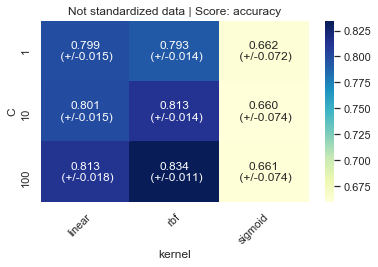

In [161]:
# get_acc(clf1_acc, "Not standardized data | Score: accuracy", "not_ss_acc.pdf")

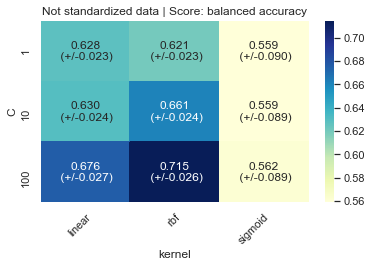

In [162]:
# get_acc(clf1_acc_bal, "Not standardized data | Score: balanced accuracy", "not_ss_bacc.pdf")

In [47]:
def cm(clf, title, filesave):
    disp = plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                                 values_format = "d",
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.grid(False)
    plt.savefig(filesave)
    plt.show()
cm(clf1_acc, "Confusion matrix\nNot standardized data", "cm_not_ss.pdf")

NameError: name 'clf1_acc' is not defined

In [163]:
clf2_acc = load("gscv_1589752629.joblib")
clf2_acc_bal = load("gscv_1589754277.joblib")

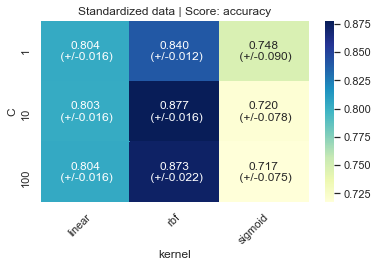

In [166]:
# get_acc(clf2_acc, "Standardized data | Score: accuracy", "ss_acc.pdf")

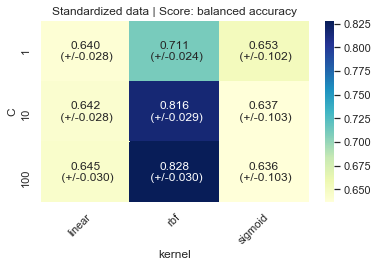

In [167]:
# get_acc(clf2_acc_bal, "Standardized data | Score: balanced accuracy", "ss_acc_bal.pdf")

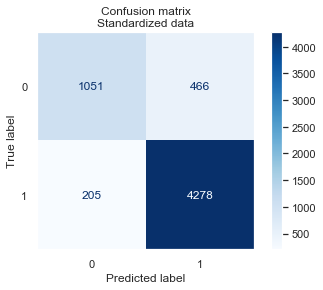

In [189]:
cm(clf2_acc, "Confusion matrix\nStandardized data", "cm_ss.pdf")

In [190]:
clf3_acc = load("gscv_1589755987.joblib")
clf3_acc_bal = load("gscv_1589757598.joblib")


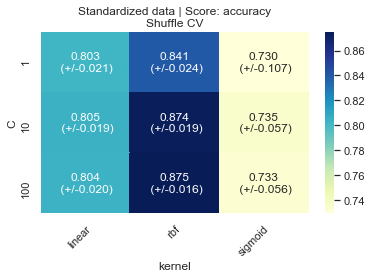

In [191]:
get_acc(clf3_acc, "Standardized data | Score: accuracy\nShuffle CV", "ss_acc_shuffle.pdf")

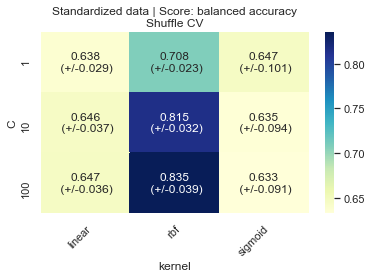

In [194]:
get_acc(clf3_acc_bal, "Standardized data | Score: balanced accuracy\nShuffle CV", "ss_acc_bal_shuffle.pdf")

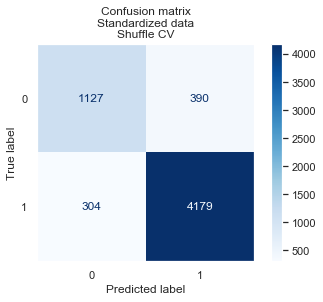

In [193]:
cm(clf3_acc, "Confusion matrix\nStandardized data\nShuffle CV", "cm_ss_shuffle.pdf")

In [43]:
df = pd.read_csv('131770-svm.txt', sep="\t")
features = list(df.columns)
features.remove('class')
X = df.loc[:, features].values
y = df.loc[:,['class']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

svc = SVC()

pipeline = Pipeline([('transformer', scalar), ('estimator', svc)])

parameters = {'estimator__kernel':('linear', 'rbf', 'sigmoid'),
              'estimator__C':[1, 10, 100]}
scores = {'accuracy': make_scorer(accuracy_score),
          'balanced_accuracy': make_scorer(balanced_accuracy_score)}

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(pipeline,
                       param_grid=parameters,
                       scoring=score,
                       cv=StratifiedKFold(n_splits=10),
                       n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    dump(clf, "gscv_{}.joblib".format(int(time.time())))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'estimator__C': 10, 'estimator__kernel': 'rbf'}

Grid scores on development set:

0.801 (+/-0.015) for {'estimator__C': 1, 'estimator__kernel': 'linear'}
0.804 (+/-0.014) for {'estimator__C': 1, 'estimator__kernel': 'rbf'}
0.608 (+/-0.024) for {'estimator__C': 1, 'estimator__kernel': 'sigmoid'}
0.802 (+/-0.015) for {'estimator__C': 10, 'estimator__kernel': 'linear'}
0.838 (+/-0.015) for {'estimator__C': 10, 'estimator__kernel': 'rbf'}
0.603 (+/-0.023) for {'estimator__C': 10, 'estimator__kernel': 'sigmoid'}
0.804 (+/-0.017) for {'estimator__C': 100, 'estimator__kernel': 'linear'}
0.833 (+/-0.021) for {'estimator__C': 100, 'estimator__kernel': 'rbf'}
0.602 (+/-0.023) for {'estimator__C': 100, 'estimator__kernel': 'sigmoid'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-scor

In [44]:
clf4_acc = load("gscv_1589809381.joblib")
clf4_acc_bal = load("gscv_1589809807.joblib")

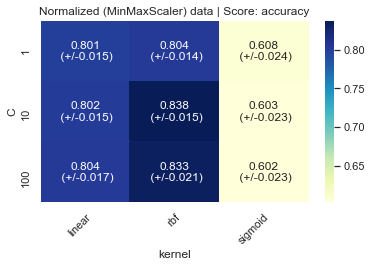

In [48]:
get_acc(clf4_acc, "Normalized (MinMaxScaler) data | Score: accuracy", "mms_acc.pdf")

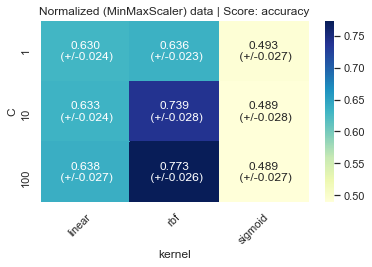

In [49]:
get_acc(clf4_acc_bal, "Normalized (MinMaxScaler) data | Score: accuracy", "mms_acc_bal.pdf")

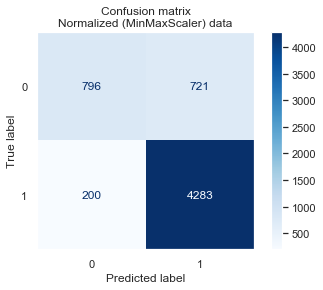

In [50]:
cm(clf4_acc, "Confusion matrix\nNormalized (MinMaxScaler) data", "cm_mms.pdf")